# Реализация и сравнение алгоритмов nadaray-watson и lowess

## Импортируем нужные пакеты для реализации алгоритмов

In [7]:
import numpy as np
from scipy.spatial import distance
import pylab as plt
import math

## обьявим Ядра и Всопомогательные функции

In [8]:
def gauss(r):
    return (2 * math.pi) ** -0.5 * math.exp(-0.5 * r ** 2)

def quartic(r):
    return 15/16 * (1 - r ** 2) ** 2 * (abs(r) <= 1)

def draw():
    plt.xticks(fontsize=32,c='green')
    plt.yticks(fontsize=32,c='green')
    plt.rcParams["figure.figsize"] = [12,8]
    plt.scatter(x, y, label='data', color="black",s=100)
    plt.plot(x, y_nadaray, label='nadaray-watson', color="red",linewidth=5)
    plt.plot(x, y_lowess, label='lowess', color="blue",linewidth=5)
    plt.xlabel('X', fontsize = 26)
    plt.ylabel('Y',fontsize = 26)
    plt.title('Nadaray Watson vs Lowess', fontsize=30,color="red")
    plt.legend(loc=2, prop={'size': 20})

In [9]:
def nadaray_watson(x, y):
    n = len(x)
    w = []
    for t in range(n):
        w.append([])
        for i in range(n):
            w[t].append(gauss(distance.euclidean(x[t], x[i]) / h))
    w = np.array(w)
    y_nadaray = (w * y[:, None]).sum(axis=0) / w.sum(axis=0)
    return y_nadaray

In [10]:
def lowess(x, y):
    n = len(x)
    gamma = np.ones(n)
    gamma_old = np.zeros(n)
    while np.abs(sum(gamma) - sum(gamma_old))>=eps:
        w = []
        for t in range(n):
            w.append([])
            for i in range(n):
                w[t].append(gauss(distance.euclidean(x[t], x[i]) / h)*gamma[t])
        w = np.array(w)
        y_lowess = (w * y[:, None]).sum(axis=0) / w.sum(axis=0)
        err = np.abs(y_lowess - y)
        gamma_old = gamma[:]
        gamma = [quartic(err[j]) for j in range(n)]
    return y_lowess



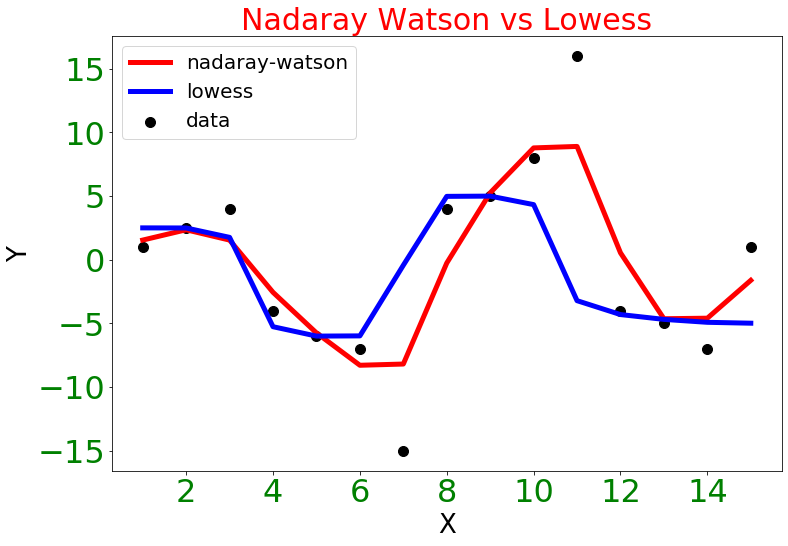

In [11]:
h = 0.8
eps = 1e-5
x = np.asarray([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
y = np.asarray([1,2.5,4,-4,-6,-7,-15,4,5,8,16,-4,-5,-7,1])

y_nadaray = nadaray_watson(x, y)
y_lowess = lowess(x, y)
draw()




